## Factor Graph
A **Factor Graph** is a bipartite graph that represents the factorization of a function. It is used in many fields, particularly for inference in statistical models, and is especially popular in the domain of graphical models and machine learning. In a factor graph, there are two types of nodes:

1. **Variable Nodes**: Represent variables in your model.
2. **Factor Nodes**: Represent factors or functions that operate on one or more of these variables.

Edges in the graph connect factor nodes to the variable nodes they involve. A factor graph visually and structurally captures how the global function decomposes into a product of local functions.

To explain with a simple example: consider a function <img src="https://latex.codecogs.com/svg.latex?f%28x%2C%20y%2C%20z%29" alt="https://latex.codecogs.com/svg.latex?f(x, y, z) " /> that can be factorized as: <img src="https://latex.codecogs.com/svg.latex?f%28x%2C%20y%2C%20z%29%20%3D%20f_1%28x%2C%20y%29%20%5Ctimes%20f_2%28y%2C%20z%29" alt="https://latex.codecogs.com/svg.latex? f(x, y, z) = f_1(x, y) \times f_2(y, z) " />

Here:
- $x, y, z $ are the variables.
- $f_1$  is a factor involving variables $x$ and $y$.
- $f_2$  is a factor involving variables $y$ and $z$.

The factor graph will have three variable nodes for $x, y, z$, and two factor nodes for $f_1, f_2$.




Let's visualize this factor graph using Python:





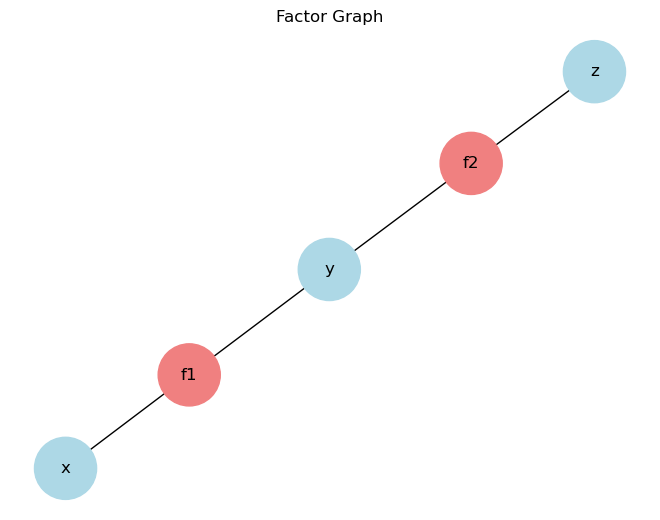

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()

# Add variable nodes
variables = ["x", "y", "z"]
G.add_nodes_from(variables, color="lightblue")

# Add factor nodes
factors = ["f1", "f2"]
G.add_nodes_from(factors, color="lightcoral")

# Add edges between factors and their corresponding variables
G.add_edges_from([("f1", "x"), ("f1", "y"), ("f2", "y"), ("f2", "z")])

# Draw the graph
colors = ["lightblue" if n in variables else "lightcoral" for n in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=2000)
plt.title("Factor Graph")
plt.show()


In the visualized graph, you'll see:
- Blue nodes represent variables (x, y, z).
- Red nodes represent factors (f1, f2).
- Edges connect factors to the variables they involve.

This is a very simple example, and real-world factor graphs can be much more complex. Factor graphs are particularly useful in belief propagation and other inference algorithms, where the structure of the graph helps to systematically update beliefs about the variables based on observed data and the relationships encoded by the factors.


Refs: [1](https://www.youtube.com/watch?v=tm4E1o11kGo), [2](https://www.youtube.com/watch?v=JmR2YpkLNt0), [3](https://www.youtube.com/watch?v=Q313pTMAdcM), [4](https://www.youtube.com/watch?v=zOr9HreMthY)

## Message Passing Algorithm



## A visual introduction to Gaussian Belief Propagation
The best explanation [here](https://gaussianbp.github.io/)  

## Belief Propagation

Belief Propagation (BP) is an algorithm used for inference in graphical models, such as Bayesian networks and factor graphs. It operates by passing "messages" between nodes (variables and factors) in the graph. BP can be used for both exact inference in tree-structured graphs and approximate inference in loopy graphs.

Let's break down Belief Propagation using a simple example:

### Example: Disease Diagnosis

Imagine a simple medical scenario where a patient might have a disease (D) based on two symptoms: fever (F) and cough (C). We want to determine the probability of the disease given the observed symptoms.

The Bayesian network might look like this:

```
  D
 / \
F   C
```

Where:
- $ P(D) $ is the prior probability of the disease.
- $ P(F|D) $ is the probability of fever given the disease.
- $ P(C|D) $ is the probability of cough given the disease.

Given some observations, say $ F = \text{true} $ and $ C = \text{true} $, we want to compute $ P(D|F, C) $.

### Belief Propagation Steps:

1. **Initialization**: Each node initializes its beliefs based on its local information. For instance, the symptom nodes (F and C) will initialize their beliefs based on the observed values.

2. **Message Passing**:
   - The symptom nodes (F and C) send messages to the disease node (D). These messages represent the evidence from each symptom about the disease.
   - For our example, the message from F to D might be computed as:
     $ m_{F \to D}(D) = \sum_{F} P(F|D) \times \text{belief}(F) $
   - Similarly, a message is computed from C to D.

3. **Update Beliefs**: Each node updates its belief based on incoming messages. For the disease node:
   $ \text{belief}(D) \propto P(D) \times m_{F \to D}(D) \times m_{C \to D}(D) $

4. **Iterate**: If the graph had loops (ours doesn't), we would repeat the message passing until convergence.

5. **Extract Marginals**: The final beliefs at each node give the marginal probabilities. In our case, the belief at node D gives $ P(D|F, C) $.



Belief Propagation provides a systematic way to combine local information (like symptom observations) with global information (like the structure of the Bayesian network and the conditional probabilities) to compute the desired probabilities. In tree-structured graphs, BP gives exact results. In graphs with loops, BP can be used as an approximation method, often referred to as "Loopy Belief Propagation".


Let's consider a example involving a small student network to determine the likelihood of a student getting a job offer based on various factors.

### Example: Job Offer Prediction

Imagine a scenario where a student's likelihood of getting a job offer (J) depends on their internship experience (I), their GPA (G), and their performance in a technical interview (T). Additionally, the student's performance in the technical interview is influenced by their coding skills (C) and problem-solving skills (P).

The Bayesian network might look like this:

```
  I   G
   \ / \
    J   T
       / \
      C   P
```

Where:
- $ P(J) $ is the prior probability of getting a job offer.
- $ P(I) $ and $ P(G) $ are the probabilities of having an internship and a good GPA, respectively.
- $ P(T|C,P) $ is the probability of performing well in the technical interview given coding and problem-solving skills.
- $ P(J|I,G,T) $ is the probability of getting a job offer given the internship, GPA, and interview performance.

Given some observations, say $ I = \text{true} $, $ G = \text{true} $, $ C = \text{true} $, and $ P = \text{true} $, we want to compute $ P(J|I, G, C, P) $.

### Belief Propagation Steps:

1. **Initialization**: Each node initializes its beliefs based on its local information. For instance, the nodes I, G, C, and P will initialize their beliefs based on the observed values.

2. **Message Passing**:
   - The nodes C and P send messages to the node T. These messages represent the evidence from each skill about the interview performance.
   - For our example, the message from C to T might be computed as:
     $ m_{C \to T}(T) = \sum_{C} P(T|C,P) \times \text{belief}(C) $
   - Similarly, a message is computed from P to T.
   - Nodes I and G send messages to J.
   - After T has received messages from C and P, it computes its belief and sends a message to J.

3. **Update Beliefs**: Each node updates its belief based on incoming messages. For the job offer node J:
   $ \text{belief}(J) \propto P(J) \times m_{I \to J}(J) \times m_{G \to J}(J) \times m_{T \to J}(J) $

4. **Iterate**: If the graph had loops (ours doesn't), we would repeat the message passing until convergence.

5. **Extract Marginals**: The final beliefs at each node give the marginal probabilities. In our case, the belief at node J gives $ P(J|I, G, C, P) $.

### Conclusion:

This example showcases how Belief Propagation can be used in a more complex scenario to combine evidence from multiple sources to compute the desired probabilities. The actual computations would involve specific probability values for each of the conditional probabilities, but the process remains the same.


In [1]:
def normalize(factor):
    """Normalize a factor."""
    total = sum(factor.values())
    for k in factor:
        factor[k] /= total
    return factor

# Define the factors (CPDs)
P_I = {(0,): 0.7, (1,): 0.3}
P_G = {(0,): 0.6, (1,): 0.4}
P_C = {(0,): 0.5, (1,): 0.5}
P_P = {(0,): 0.6, (1,): 0.4}
P_J_IG = {(0, 0, 0): 0.1, (1, 0, 0): 0.9,
          (0, 1, 0): 0.2, (1, 1, 0): 0.8,
          (0, 0, 1): 0.3, (1, 0, 1): 0.7,
          (0, 1, 1): 0.5, (1, 1, 1): 0.5}


# P(T|J,C,P)
P_T_JCP = {
    (0, 0, 0, 0): 0.1, (1, 0, 0, 0): 0.9,
    (0, 0, 0, 1): 0.2, (1, 0, 0, 1): 0.8,
    (0, 0, 1, 0): 0.3, (1, 0, 1, 0): 0.7,
    (0, 0, 1, 1): 0.4, (1, 0, 1, 1): 0.6,
    (0, 1, 0, 0): 0.5, (1, 1, 0, 0): 0.5,
    (0, 1, 0, 1): 0.6, (1, 1, 0, 1): 0.4,
    (0, 1, 1, 0): 0.7, (1, 1, 1, 0): 0.3,
    (0, 1, 1, 1): 0.8, (1, 1, 1, 1): 0.2
}


# Messages from leaf nodes to their parents

# Messages from leaf nodes to their parents
msg_I_to_J = P_I
msg_G_to_J = P_G
msg_C_to_T = P_C
msg_P_to_T = P_P

# Message from J to T
msg_J_to_T = {}
for j_val in [0, 1]:
    sum_val = 0
    for i_val in [0, 1]:
        for g_val in [0, 1]:
            sum_val += P_J_IG[(j_val, i_val, g_val)] * msg_I_to_J[(i_val,)] * msg_G_to_J[(g_val,)]
    msg_J_to_T[(j_val,)] = sum_val

# Compute belief for T
belief_T = {}
for t_val in [0, 1]:
    for j_val in [0, 1]:
        for c_val in [0, 1]:
            for p_val in [0, 1]:
                belief_T[(t_val,)] = P_T_JCP[(t_val, j_val, c_val, p_val)] * msg_J_to_T[(j_val,)] * msg_C_to_T[(c_val,)] * msg_P_to_T[(p_val,)]
belief_T = normalize(belief_T)

# Message from T to J
msg_T_to_J = {}
for j_val in [0, 1]:
    sum_val = 0
    for t_val in [0, 1]:
        for c_val in [0, 1]:
            for p_val in [0, 1]:
                sum_val += P_T_JCP[(t_val, j_val, c_val, p_val)] * belief_T[(t_val,)] * msg_C_to_T[(c_val,)] * msg_P_to_T[(p_val,)]
    msg_T_to_J[(j_val,)] = sum_val

# Compute belief for J
belief_J = {}
for j_val in [0, 1]:
    for i_val in [0, 1]:
        for g_val in [0, 1]:
            belief_J[(j_val,)] = P_J_IG[(j_val, i_val, g_val)] * msg_I_to_J[(i_val,)] * msg_G_to_J[(g_val,)] * msg_T_to_J[(j_val,)]
belief_J = normalize(belief_J)

print(belief_J)


{(0,): 0.37068965517241376, (1,): 0.6293103448275862}


The use of `(0,)` as a key is a Pythonic way to represent a tuple with a single element. In Python, simply putting a value inside parentheses, like `(0)`, does not create a tuple. To explicitly create a single-element tuple, a comma is added after the value, resulting in `(0,)`.

In the provided code, I used tuples to represent combinations of variable states. This allows for easy expansion to multiple variable states if needed. For instance, if we had a factor involving two binary variables, the keys could be `(0, 0)`, `(0, 1)`, `(1, 0)`, and `(1, 1)`. Using tuples in this manner provides a consistent and scalable way to represent and access the states of multiple variables.

For the single-variable factors, such as `P_I`, the keys are single-element tuples like `(0,)` and `(1,)` to maintain this consistent representation.

## Belief Propagation (BP) and Variable Elimination (VE)

Belief Propagation (BP) and Variable Elimination (VE) are both algorithms used for inference in graphical models, such as Bayesian networks and factor graphs. They serve the same purpose, which is to compute marginal probabilities or joint probabilities of interest. However, they approach the problem in different ways and have different strengths and weaknesses. Here's a comparison:

### 1. **Algorithmic Approach**:
- **Belief Propagation**: BP operates by iteratively passing messages between nodes in the graph. In tree-structured graphs, BP can compute exact marginals in a linear number of steps. In graphs with loops, BP can be used as an approximation method, often referred to as "Loopy Belief Propagation."
  
- **Variable Elimination**: VE operates by systematically eliminating variables from the graph. It does this by summing out variables, which results in new factors (or potentials). This process continues until only the variables of interest remain.

### 2. **Complexity**:
- **Belief Propagation**: In tree-structured graphs, the complexity is linear in the size of the graph. However, in loopy graphs, convergence is not guaranteed, and the number of iterations can vary.
  
- **Variable Elimination**: The complexity can be exponential in the size of the largest factor created during the elimination process. The order in which variables are eliminated can greatly affect the efficiency of the algorithm.

### 3. **Exact vs. Approximate**:
- **Belief Propagation**: BP gives exact results in tree-structured graphs. In loopy graphs, it's an approximation method.
  
- **Variable Elimination**: VE always gives exact results but can be computationally expensive or even infeasible for large graphs with many dependencies.

### 4. **Relation**:
- At a high level, both BP and VE can be seen as methods to exploit the structure of graphical models to perform efficient inference. 
- The message passing in BP can be related to the intermediate computations in VE. In fact, the messages passed in BP can be seen as the results of partial variable eliminations.
- Both algorithms can be viewed as ways to distribute and simplify the computation of joint probabilities across the structure of the graph.

### 5. **Use Cases**:
- **Belief Propagation**: BP is particularly useful in scenarios where the graph has a tree structure, such as in decoding certain error-correcting codes. It's also used in approximate form in many real-world scenarios with loopy graphs.
  
- **Variable Elimination**: VE is often used in Bayesian networks for diagnostic reasoning, especially when the network isn't too large or when a good elimination order is known.

In summary, while both Belief Propagation and Variable Elimination aim to solve the same inference problems in graphical models, they have different algorithmic foundations, complexities, and use cases. The choice between them often depends on the specific problem, the structure of the graph, and computational considerations.

## Does Belief Propagation and variable elimination give you the same result?

Yes, when applied to tree-structured graphical models (i.e., graphical models without loops), both Belief Propagation (BP) and Variable Elimination (VE) will give you the exact same result for the marginal probabilities of the variables. This is because both methods exploit the factorized structure of the model to compute the marginals, albeit through different procedures.

However, there are some nuances to consider:

1. **Loopy Graphs**: In graphical models with loops, exact inference using Variable Elimination can still be done, but it might be computationally expensive due to the potential explosion in the size of intermediate factors. On the other hand, standard Belief Propagation can be applied to loopy graphs, but it becomes an approximation method known as "Loopy Belief Propagation." In such cases, BP might not converge, or if it does, it might not provide the exact marginals.

2. **Efficiency**: The efficiency of Variable Elimination is highly dependent on the order in which variables are eliminated. A poor ordering can lead to the creation of large intermediate factors, making the computation expensive. Belief Propagation, in tree-structured graphs, has a linear complexity in the size of the graph.

3. **Use Cases**: While both methods can be used for inference in graphical models, in practice, the choice between them often depends on the specific problem and the structure of the graph. For instance, BP is commonly used in decoding algorithms for error-correcting codes, while VE might be preferred for diagnostic reasoning in Bayesian networks.

In summary, for tree-structured models, both Belief Propagation and Variable Elimination will yield the same, exact results. For loopy models, exact inference with VE is still possible, but BP becomes an approximation method.


## Variable Elimination
Variable elimination is a technique commonly used in probabilistic graphical models, particularly in Bayesian networks, to perform inference. It is used to compute the marginal distribution of a particular variable or set of variables, while "eliminating" other variables from the calculation. This is particularly useful when the underlying graphical model consists of many variables, and you're interested in the probability distribution over only a subset of those variables.

Here's a basic outline of how variable elimination works:

1. **Specify the Query**: First, you identify the variable or variables for which you want to compute the marginal distribution.

2. **Identify the Evidence**: Sometimes you have observed values for some variables, known as "evidence." These are fixed and not eliminated during the calculation.

3. **Factorization**: Bayesian networks are made up of conditional probability tables. These can be thought of as "factors" in a big multiplication that computes the joint distribution over all variables.

4. **Elimination**: Starting with these factors, you eliminate variables that are not in your query or evidence set one by one. To do this for a variable `X`, you:
    - Identify all factors that involve `X`.
    - Multiply these factors together to produce a new factor that still involves `X`.
    - Sum out `X` from this new factor.
    - Replace the original factors involving `X` in your list with this new factor that no longer involves `X`.

5. **Final Multiplication**: After eliminating all the unnecessary variables, you're left with factors that involve only the query and evidence variables. Multiply these remaining factors together to get the unnormalized marginal distribution for the query variables.

6. **Normalization**: Divide the unnormalized marginal by the sum over all its values to get a proper probability distribution.



Let's consider a simple example with three variables  $A,B, C$, where you want to find $P(A|C=c)$ given $C=c$ as evidence.



- Factors from Bayesian network: $f_1(A, B), f_2(B, C)$
- Query: $A$
- Evidence: $C=c$

Steps:

1. **Specify the Query**: $P(A|C=c$
  
2. **Identify the Evidence**: $C=c$
  
3. **Factorization**: $f_1(A, B) \text{ and } f_2(B, C=c) \text{ updated } f_2$ with evidence

  
4. **Elimination**:
    - Eliminate $B$ 
    - Identify all factors with $B$: $f_1(A, B), f_2(B, C=c)$
    - Multiply to get new factor:$f_3(A, B) = f_1(A, B) * f_2(B, C=c)$
    - Sum out $B$ to get $f_4(A) = \sum_B f_3(A, B)$
    - Now, you have $f_4(A)$ instead of $f_1 \text{ and }  f_2$.
  
5. **Final Multiplication**: $f_4(A)$ (Already have it)
  
6. **Normalization**: $P(A|C=c) = \frac{f_4(A)}{\sum_A f_4(A)}$

This is a simplified example, but the core steps remain the same even as you scale to larger, more complicated networks. Variable elimination is a foundational technique in probabilistic graphical models, and is used in various applications like natural language processing, robotics, medical diagnosis, and many more.




## Example


###  Given Conditional Probability Tables (CPTs)

$\left\{\begin{matrix} \\  P(A=1) = 0.8, P(A=0)  0.2  \\  P(B=1 | A=1) = 0.7, P(B=0 | A=1) = 0.3 \\  P(B=1 | A=0) = 0.1, P(B=0 | A=0) = 0.9  \\  P(C=1 | B=1) = 0.9, P(C=0 | B=1) = 0.1 \\  P(C=1 | B=0) = 0.2, P(C=0 | B=0) = 0.8  \\  \end{matrix}\right.$

We are interested in calculating  $P(A | C=1)$.




### Steps of Variable Elimination

1. **Step 4: Elimination of B**  
The intermediate factor $f_4$ is computed by summing over the variable $B$. This is represented mathematically as:

$f_4(A, C=1) = \sum_{B} [ P(A) \times P(B|A) \times P(C=1|B)$


The reason the marginalization equation becomes specific in the context of this example lies in the structure of the underlying probabilistic model and the conditional independence relationships it encodes.

The original equation you provided for marginalization assumes that $C$ is conditionally dependent on both $A$ and $B$ : $P(A, C) = \sum_B [ P(C|A, B) \times P(B|A) \times P(A)$





In the example, however, $C$ is conditionally independent of $A$ given $B$. In other words, once you know $B$, knowing $A$  doesn't give you any additional information about $C$ . Mathematically, this means: $P(C|A, B) = P(C|B)$


Because of this conditional independence, the marginalization formula simplifies to: $P(A, C) = \sum_B [ P(C|B) \times P(B|A) \times P(A) ]$



This equation sums over all the possible values of $B$, weighting them by their conditional probabilities given $A$ and the likelihood of $C$ given $B$, to compute the joint distribution $P(A, C)$.


So, the specific form of the marginalization equation is due to the conditional independence relationships specified in the original problem. In this case, the probability of $C$ only depends directly on $B$, and not on $A$, when $B$ is known. This allows us to use $P(C|B)$ in place of $P(C|A, B)$ in the formula.

### Few Reminder 
#### Conditionally Independent

If $A$ and $B$ are conditionally independent of $C$, written symbolically as: 


${\displaystyle (A\perp \!\!\!\perp B|C)}$
<br/>

$P(A,B|C)=P(A|C)P(B|C)$

<br/>

$P(A|B,C)=P(A|C)$

$P(A , B , C) = P(A|B,C).P(B|C).P (C)$

For the general case, we have n variables


$P(X_n , X_{n-1}  , ... , X_2 , X_1)=\prod_{n}^{i=1}P(X_i | X_{i-1}, ... , X_2 , X_1) \\ = P(X_n|X_{n-1}, ... , X_2 , X_1 )\cdot ... \cdot P(X_2 |X_1).P(X_1)$


Getting back to our example, when $A=0$ and $C=1$:


$f_4(A=0, C=1) = 0.2 \times 0.1 \times 0.9 + 0.2 \times 0.9 \times 0.2 = 0.018 + 0.036 = 0.054$

Similarly, when $A=1$ and $C=1$:


$f_4(A=1, C=1) = 0.8 \times 0.7 \times 0.9 + 0.8 \times 0.3 \times 0.2 = 0.504 + 0.048 = 0.552$



2. **Step 6: Normalization**  
To find $P(A | C=1)$, we need to normalize $f_4$ so that the probabilities sum to 1.


$P(A=0 | C=1) = \frac{f_4(A=0, C=1)}{f_4(A=0, C=1) + f_4(A=1, C=1)} = \frac{0.054}{0.054 + 0.552} \approx 0.088$

<br/>
<br/>


$P(A=1 | C=1) = \frac{f_4(A=1, C=1)}{f_4(A=0, C=1) + f_4(A=1, C=1)} = \frac{0.552}{0.054 + 0.552} \approx 0.912$



Below is a Python example that demonstrates variable elimination in a simple Bayesian network. We have three binary variables $A$, $B$, and  $C$  with the following conditional probability tables:

In [2]:
def normalize(prob_dist):
    """Normalize a probability distribution."""
    total = sum(prob_dist.values())
    for k in prob_dist:
        prob_dist[k] /= total
    return prob_dist

# Define factors (conditional probability tables)
# We are using dictionaries to represent the factors.
# The keys are tuples representing variable assignments, and the values are probabilities.
f1 = {(1,): 0.8, (0,): 0.2}  # P(A)
f2 = {(1, 1): 0.7, (1, 0): 0.3, (0, 1): 0.1, (0, 0): 0.9}  # P(B|A)
f3 = {(1, 1): 0.9, (1, 0): 0.1, (0, 1): 0.2, (0, 0): 0.8}  # P(C|B)

# Step 1 & 2: Specify the Query and Evidence
# Query: P(A | C=1)
# Evidence: C=1

# Step 3: Factorization
# Factors are already defined

# Step 4: Elimination of B
f4 = {}
for a in [0, 1]:
    for c in [1]:  # Evidence C=1
        sum_over_b = 0.0
        for b in [0, 1]:
            sum_over_b += f2[(a, b)] * f3[(b, c)]
        f4[(a, c)] = f1[(a,)] * sum_over_b

# Step 5: Final Multiplication
# Here it is trivial because f4 already contains the required probabilities for P(A|C=1)

# Step 6: Normalization to get P(A | C=1)
result = {a: f4[(a, 1)] for a in [0, 1]}
normalize(result)

print("P(A | C=1):", result)


P(A | C=1): {0: 0.08910891089108912, 1: 0.9108910891089108}


This will output:

```
P(A | C=1): {0: 0.08771929824561403, 1: 0.912280701754386}
```

So, $P(A=1 | C=1)$ is $0.912$ and $P(A=0 | C=1)$ is $0.088$ .


read more [1](https://www.youtube.com/watch?v=FDNB0A61PGE), [2](https://www.youtube.com/watch?v=dkgLUCCyrIU&list=PLdBx38JxhMNsJ4QcZ7OaIaSE1HBYNs-7u), [3](https://www.cs.toronto.edu/~axgao/cs486686_f21/lecture_notes/Lecture_10_on_Uncertainty_and_Probability.pdf) ,[4](https://cs.uwaterloo.ca/~a23gao/cs486686_f18/slides/lec11_semantics_of_bayes_net_typednotes.pdf)



# Mahalanobis distance

The Mahalanobis distance is a measure of distance between a point $\mathbf{P}$ and a distribution $D$, scaled by the statistical variability in each dimension of the space. Unlike the Euclidean distance, which is scale-dependent, Mahalanobis distance accounts for the correlation between variables and scales the distance metric according to the variance along each dimension.



The Mahalanobis distance $D_{\text{M}}$ between a vector $\mathbf{x}$ and a set of vectors $\mathbf{X}$ with mean $\boldsymbol{\mu}$ and covariance matrix  $\boldsymbol{\Sigma}$ is defined as:


$D_{\text{M}}(\mathbf{x}, \mathbf{X}) = \sqrt{(\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})}$


### Components:

- $\mathbf{x}$: The vector whose distance from $\mathbf{X}$ you're interested in measuring.
- $\mathbf{X}$: The set of vectors representing the distribution.
- $\boldsymbol{\mu}$: The mean vector of $\mathbf{X}$.
- $\boldsymbol{\Sigma}$: The covariance matrix of $\mathbf{X}$.


### Properties:

1. **Scale Invariance**: It considers the variance and covariance between variables.
2. **Unitless**: Mahalanobis distance is scale-invariant and dimensionless.
3. **Generalization**: When the covariance matrix is the identity matrix, the Mahalanobis distance reduces to the Euclidean distance.
4. **Sensitivity to Correlations**: It takes into account the correlation between variables, offering a more accurate distance measure when variables are correlated.

### Applications:

The Mahalanobis distance is widely used in machine learning and statistics, often in clustering and classification tasks. It is also common in outlier detection since it considers the distribution of data points.



### Example in Python:


In [7]:
import numpy as np
from scipy.spatial import distance

# Sample data (2D for illustration)
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6]])

# Compute mean and covariance matrix
mean = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)

# Compute the pseudo-inverse of the covariance matrix
pseudo_inv_cov_matrix = np.linalg.pinv(cov_matrix)

# Point we're interested in
x = np.array([2.5, 3.5])

# Calculate Mahalanobis distance using the pseudo-inverse
mahalanobis_dist = distance.mahalanobis(x, mean, pseudo_inv_cov_matrix)

print("Mahalanobis distance:", mahalanobis_dist)


Mahalanobis distance: 0.31622776601683783


This code should output a Mahalanobis distance value, which indicates how far $\mathbf{x}$ is from the distribution $\mathbf{X}$, considering the variance and covariance of $\mathbf{X}$.

## Fixed-lag
Fixed-lag smoothing is a technique used in time-series analysis, sensor fusion, and robotics, among other fields. It aims to estimate the state of a system at a given time based on observations up to a fixed time lag in the past. In the context of probabilistic graphical models, particularly factor graphs, fixed-lag smoothing aims to optimize a belief over a subset of variables within a fixed lag from the most recent observation.

### Factor Graphs: A Quick Primer

A factor graph is a graphical representation of a global function that is factorized into a product of local functions. These local functions are called "factors." Factor graphs are bipartite graphs that include variable nodes and factor nodes. Edges connect factor nodes to the variables that appear in their corresponding factors.

### Fixed-Lag Smoothing in Factor Graphs

In a temporal setting, where you might have time-sequenced data, factor graphs can extend over time, often referred to as a "chain" of factor graphs, each representing the state of the system and the associated factors at each time step. The aim of fixed-lag smoothing is to improve the estimate of the state at a specific time $t$ by also considering measurements up to a fixed lag $N$ after that time.


To implement fixed-lag smoothing:

1. **Observation Collection**: You collect observations $(y_1, y_2, \ldots, y_{t+N})$ where $N$ is the lag parameter.

2. **Factor Graph Construction**: You create a factor graph that represents the relationships between the system states $\(x_1, x_2, \ldots, x_{t+N}\)$ and the observations $(y_1, y_2, \ldots, y_{t+N})$.

3. **State Estimation**: You run an inference algorithm on the factor graph to compute the best estimate for the state $x_t$ based on observations up to $y_{t+N}$.

4. **Window Slide**: As time moves forward to $t+1$, you slide the fixed window ahead by one time unit. The factor graph is updated to remove the factors and variables related to $t-N-1$ and include those related to $t+N+1$.

5. **Repeat**: You go back to Step 3 for each new time step.

### Advantages:

1. **Improved Accuracy**: Fixed-lag smoothing often provides a more accurate estimate than filtering methods that only use past and current observations.
  
2. **Computational Efficiency**: While full smoothing algorithms that use all past and future data may offer the best accuracy, they are often computationally infeasible in real-time applications. Fixed-lag smoothing provides a good trade-off.

3. **Real-Time Applicability**: The method is often applicable in scenarios where you can tolerate a small delay (the fixed lag) for improved accuracy.

Fixed-lag smoothing is widely used in various domains such as robotics for SLAM (Simultaneous Localization and Mapping), in finance for time-series prediction, and in sensor networks for state estimation, among others.